<a href="https://colab.research.google.com/github/sksamimali2000/Rainfall-Prediction-in-Varanasi-Region-Using-Machine-Learning/blob/main/Copy_of_original_copy_of_rainFall_prediction_for_JUNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

warnings.simplefilter(action = "ignore", category = FutureWarning)

In [ ]:
import pandas as pd

# Load the dataset to inspect its structure and content
file_path = '/content/last_timebudha for June refine data.csv'
data = pd.read_csv(file_path)

# Display the first few rows and dataset summary
data.head(), data.info(), data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13500 entries, 0 to 13499
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    13500 non-null  object 
 1   lon     13500 non-null  float64
 2   lat     13500 non-null  float64
 3   100u    13500 non-null  float64
 4   100v    13500 non-null  float64
 5   10u     13500 non-null  float64
 6   10v     13500 non-null  float64
 7   2t      13500 non-null  float64
 8   e       13500 non-null  float64
 9   sp      13500 non-null  float64
 10  tp      13500 non-null  float64
 11  r       13500 non-null  float64
 12  z       13500 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.3+ MB


(               time   lon    lat      100u      100v       10u       10v  \
 0  01-06-2000 10:00  82.5  25.50  1.324371 -2.679016  0.987579 -2.262817   
 1  01-06-2000 10:00  82.5  25.50  1.324371 -2.679016  0.987579 -2.262817   
 2  01-06-2000 10:00  82.5  25.25  1.875153 -2.867493  1.451447 -2.385864   
 3  01-06-2000 10:00  82.5  25.25  1.875153 -2.867493  1.451447 -2.385864   
 4  01-06-2000 10:00  82.5  25.00  2.394684 -3.243469  1.863556 -2.637817   
 
           2t         e         sp            tp          r          z  
 0  310.99072 -0.000205  98718.484  1.910000e-06  43.459183  1914.3228  
 1  310.99072 -0.000205  98718.484  1.910000e-06  43.459183  1914.3228  
 2  311.29150 -0.000194  98525.484  9.540000e-07  40.927933  1905.9478  
 3  311.29150 -0.000194  98525.484  9.540000e-07  40.927933  1905.9478  
 4  310.92236 -0.000192  97848.484  0.000000e+00  39.088090  1905.3228  ,
 None,
                     time           lon           lat          100u  \
 count             

In [ ]:
data


,time,lon,lat,100u,100v,10u,10v,2t,e,sp,tp,r,z
0,01-06-2000 10:00,82.5,25.50,1.324371,-2.679016,0.987579,-2.262817,310.99072,-0.000205,98718.484,1.910000e-06,43.459183,1914.3228
1,01-06-2000 10:00,82.5,25.50,1.324371,-2.679016,0.987579,-2.262817,310.99072,-0.000205,98718.484,1.910000e-06,43.459183,1914.3228
2,01-06-2000 10:00,82.5,25.25,1.875153,-2.867493,1.451447,-2.385864,311.29150,-0.000194,98525.484,9.540000e-07,40.927933,1905.9478
3,01-06-2000 10:00,82.5,25.25,1.875153,-2.867493,1.451447,-2.385864,311.29150,-0.000194,98525.484,9.540000e-07,40.927933,1905.9478
4,01-06-2000 10:00,82.5,25.00,2.394684,-3.243469,1.863556,-2.637817,310.92236,-0.000192,97848.484,0.000000e+00,39.088090,1905.3228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,30-06-2024 10:00,83.0,25.50,1.951172,1.141632,1.553406,0.885788,305.75610,-0.000254,98830.914,2.480000e-05,70.480560,1925.4048
13496,30-06-2024 10:00,83.0,25.25,1.673828,0.368195,1.338562,0.263718,305.76000,-0.000219,98698.914,2.770000e-05,67.207120,1917.6548
13497,30-06-2024 10:00,83.0,25.25,1.673828,0.368195,1.338562,0.263718,305.76000,-0.000219,98698.914,2.770000e-05,67.207120,1917.6548
13498,30-06-2024 10:00,83.0,25.00,2.222656,0.637726,1.770203,0.502975,305.24440,-0.000218,97728.914,3.150000e-05,65.421970,1929.0298


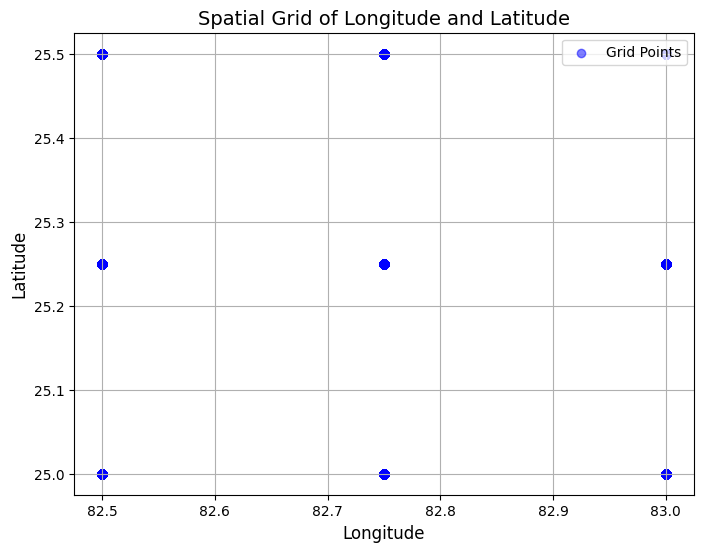

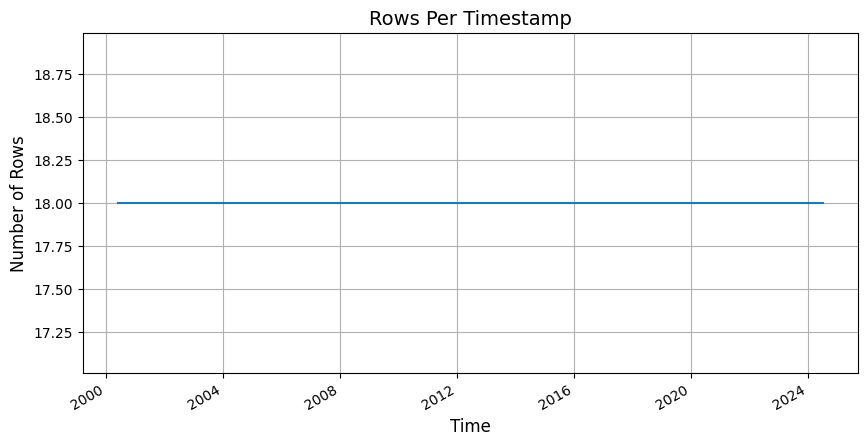

In [ ]:
import matplotlib.pyplot as plt

# Extract unique longitude, latitude, and boundaries
unique_lon = data['lon'].unique()
unique_lat = data['lat'].unique()

# Create a grid plot of longitude and latitude
plt.figure(figsize=(8, 6))
plt.scatter(data['lon'], data['lat'], alpha=0.5, c='blue', label='Grid Points')
plt.title('Spatial Grid of Longitude and Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


# Convert 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'], format="%d-%m-%Y %H:%M", errors='coerce')

rows_per_time = data.groupby('time').size()

# Plot rows per timestamp
plt.figure(figsize=(10, 5))
rows_per_time.plot()
plt.title('Rows Per Timestamp', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Rows', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
data

,time,lon,lat,100u,100v,10u,10v,2t,e,sp,tp,r,z
0,2000-06-01 10:00:00,82.5,25.50,1.324371,-2.679016,0.987579,-2.262817,310.99072,-0.000205,98718.484,1.910000e-06,43.459183,1914.3228
1,2000-06-01 10:00:00,82.5,25.50,1.324371,-2.679016,0.987579,-2.262817,310.99072,-0.000205,98718.484,1.910000e-06,43.459183,1914.3228
2,2000-06-01 10:00:00,82.5,25.25,1.875153,-2.867493,1.451447,-2.385864,311.29150,-0.000194,98525.484,9.540000e-07,40.927933,1905.9478
3,2000-06-01 10:00:00,82.5,25.25,1.875153,-2.867493,1.451447,-2.385864,311.29150,-0.000194,98525.484,9.540000e-07,40.927933,1905.9478
4,2000-06-01 10:00:00,82.5,25.00,2.394684,-3.243469,1.863556,-2.637817,310.92236,-0.000192,97848.484,0.000000e+00,39.088090,1905.3228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,2024-06-30 10:00:00,83.0,25.50,1.951172,1.141632,1.553406,0.885788,305.75610,-0.000254,98830.914,2.480000e-05,70.480560,1925.4048
13496,2024-06-30 10:00:00,83.0,25.25,1.673828,0.368195,1.338562,0.263718,305.76000,-0.000219,98698.914,2.770000e-05,67.207120,1917.6548
13497,2024-06-30 10:00:00,83.0,25.25,1.673828,0.368195,1.338562,0.263718,305.76000,-0.000219,98698.914,2.770000e-05,67.207120,1917.6548
13498,2024-06-30 10:00:00,83.0,25.00,2.222656,0.637726,1.770203,0.502975,305.24440,-0.000218,97728.914,3.150000e-05,65.421970,1929.0298


In [ ]:
# Check the number of missing values in each column of the dataset
missing_values = data.isnull().sum()

# Display the result
missing_values

,0
time,0
lon,0
lat,0
100u,0
100v,0
10u,0
10v,0
2t,0
e,0
sp,0


In [ ]:
import pandas as pd
import numpy as np

# Ensure 'time' is in datetime format
data['time'] = pd.to_datetime(data['time'])

# Extract features
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day
data['day_of_week'] = data['time'].dt.dayofweek
data['hour'] = data['time'].dt.hour

# Cyclic encoding for periodic features
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)
data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

# Drop the original 'time' column if no longer needed
data = data.drop(columns=['time'])

# Display the processed data
data.head()


,lon,lat,100u,100v,10u,10v,2t,e,sp,tp,...,z,year,month,day,day_of_week,hour,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,82.5,25.50,1.324371,-2.679016,0.987579,-2.262817,310.99072,-0.000205,98718.484,1.910000e-06,...,1914.3228,2000,6,1,3,10,1.224647e-16,-1.0,0.433884,-0.900969
1,82.5,25.50,1.324371,-2.679016,0.987579,-2.262817,310.99072,-0.000205,98718.484,1.910000e-06,...,1914.3228,2000,6,1,3,10,1.224647e-16,-1.0,0.433884,-0.900969
2,82.5,25.25,1.875153,-2.867493,1.451447,-2.385864,311.29150,-0.000194,98525.484,9.540000e-07,...,1905.9478,2000,6,1,3,10,1.224647e-16,-1.0,0.433884,-0.900969
3,82.5,25.25,1.875153,-2.867493,1.451447,-2.385864,311.29150,-0.000194,98525.484,9.540000e-07,...,1905.9478,2000,6,1,3,10,1.224647e-16,-1.0,0.433884,-0.900969
4,82.5,25.00,2.394684,-3.243469,1.863556,-2.637817,310.92236,-0.000192,97848.484,0.000000e+00,...,1905.3228,2000,6,1,3,10,1.224647e-16,-1.0,0.433884,-0.900969


In [ ]:
data.columns

Index(['lon', 'lat', '100u', '100v', '10u', '10v', '2t', 'e', 'sp', 'tp', 'r',
       'z', 'year', 'month', 'day', 'day_of_week', 'hour', 'month_sin',
       'month_cos', 'day_of_week_sin', 'day_of_week_cos'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Extract features and target variable from the dataset
X = data[['lon', 'lat', '100u', '100v', '10u', '10v', '2t', 'e', 'sp', 'r',
       'z', 'year', 'month', 'day', 'day_of_week', 'hour', 'month_sin',
       'month_cos', 'day_of_week_sin', 'day_of_week_cos']]
y = data['tp']

# Define numerical and categorical features
numerical_features = ['lon', 'lat', '100u', '100v', '10u', '10v', '2t', 'e', 'sp', 'r',
       'z', 'year', 'month', 'day', 'day_of_week', 'hour', 'month_sin',
       'month_cos', 'day_of_week_sin', 'day_of_week_cos']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)

    ]
)

# Create a pipeline for preprocessing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Apply preprocessing
X_preprocessed = pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Output results
print("Preprocessing complete.")
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Preprocessing complete.
Training set size: (10800, 20), Testing set size: (2700, 20)


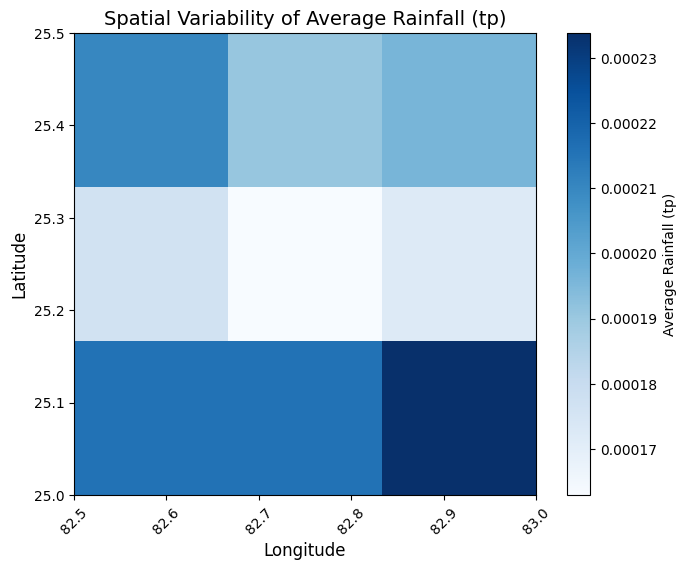

,lon,lat,tp
6,83.00,25.00,0.000234
3,82.75,25.00,0.000216
0,82.50,25.00,0.000216
2,82.50,25.50,0.000210
8,83.00,25.50,0.000196
5,82.75,25.50,0.000191
1,82.50,25.25,0.000177
7,83.00,25.25,0.000172
4,82.75,25.25,0.000163


In [ ]:
# Calculate average rainfall (tp) for each grid point (lon, lat)
spatial_avg_tp = data.groupby(['lon', 'lat'])['tp'].mean().reset_index()

# Pivot table to prepare data for heatmap-style visualization
pivot_table = spatial_avg_tp.pivot(index='lat', columns='lon', values='tp')

# Plot spatial variability of average tp (rainfall)
plt.figure(figsize=(8, 6))
plt.title('Spatial Variability of Average Rainfall (tp)', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.xticks(rotation=45)
plt.imshow(pivot_table, origin='lower', cmap='Blues', extent=[
    pivot_table.columns.min(), pivot_table.columns.max(),
    pivot_table.index.min(), pivot_table.index.max()
])
plt.colorbar(label='Average Rainfall (tp)')
plt.grid(False)
plt.show()

# Check variability by grid point statistics
spatial_avg_tp.sort_values('tp', ascending=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)


(10800, 20)
(2700, 20)



###Feature Distribution & Correlation:

In [ ]:
data.columns

Index(['lon', 'lat', '100u', '100v', '10u', '10v', '2t', 'e', 'sp', 'tp', 'r',
       'z', 'year', 'month', 'day', 'day_of_week', 'hour', 'month_sin',
       'month_cos', 'day_of_week_sin', 'day_of_week_cos'],
      dtype='object')

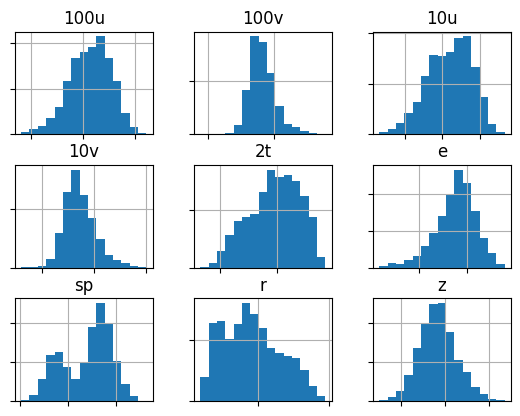

In [ ]:
# Distribution of all independent variables.
# Create a histogram of each:
new_df = data.drop(columns=['tp','lon', 'lat','year', 'month', 'day',
       'day_of_week', 'hour', 'month_sin', 'month_cos', 'day_of_week_sin',
       'day_of_week_cos'])

distr_hist = new_df.hist(bins=15)

# Disable axis labels to avoid clutter:
for axis in distr_hist.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
plt.show()

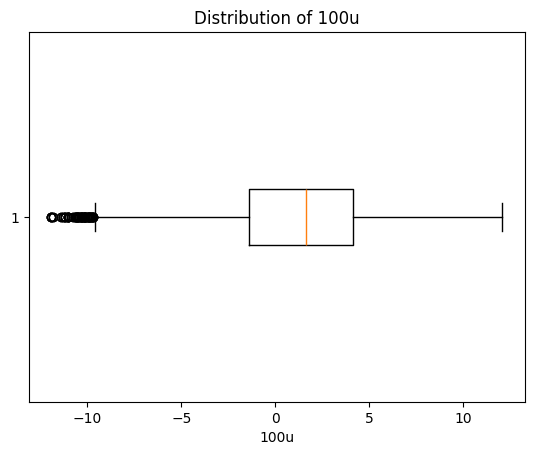

In [ ]:
plt.boxplot(data["100u"], vert = False)
plt.xlabel("100u")
plt.title("Distribution of 100u");

In [ ]:
data["100u"].describe()

,100u
count,13500.000000
mean,1.296028
std,3.927070
min,-11.930450
25%,-1.381851
50%,1.627655
75%,4.162293
max,12.090698


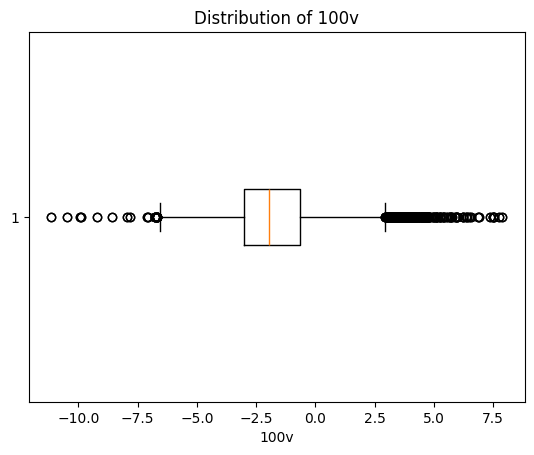

In [ ]:
plt.boxplot(data["100v"], vert = False)
plt.xlabel("100v")
plt.title("Distribution of 100v");

In [ ]:
data["100v"].describe()

,100v
count,13500.000000
mean,-1.713899
std,1.995388
min,-11.150284
25%,-3.032486
50%,-1.973709
75%,-0.647034
max,7.878784


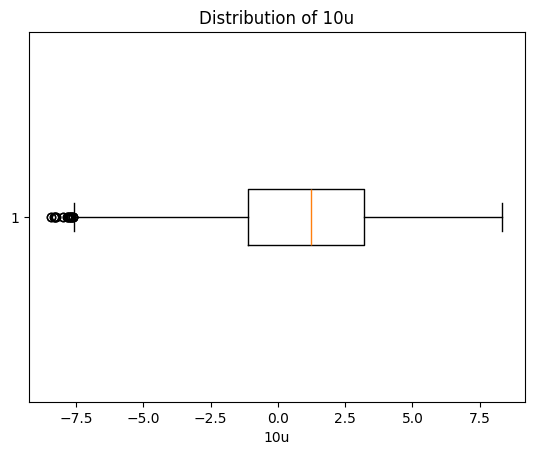

In [ ]:
plt.boxplot(data["10u"], vert = False)
plt.xlabel("10u")
plt.title("Distribution of 10u");

In [ ]:
data["10u"].describe()

,10u
count,13500.000000
mean,0.961842
std,2.942941
min,-8.429275
25%,-1.126434
50%,1.248779
75%,3.186432
max,8.333481


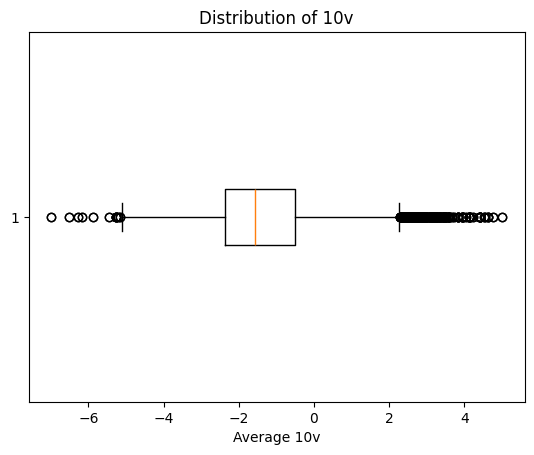

In [ ]:
plt.boxplot(data["10v"], vert = False)
plt.xlabel("Average 10v")
plt.title("Distribution of 10v");

In [ ]:
data["10v"].describe()

,10v
count,13500.000000
mean,-1.353102
std,1.515571
min,-6.988342
25%,-2.371964
50%,-1.569901
75%,-0.512482
max,5.003296


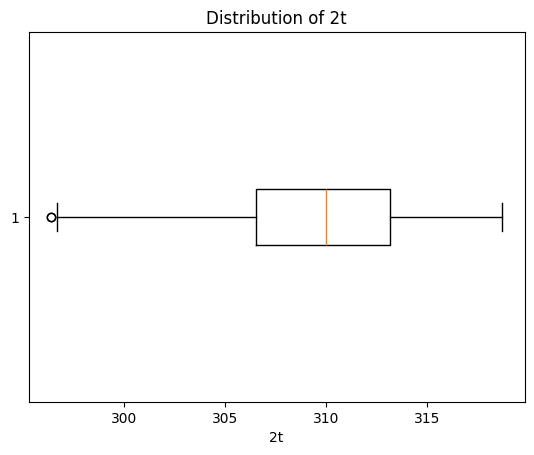

In [ ]:
plt.boxplot(data["2t"], vert = False)
plt.xlabel("2t")
plt.title("Distribution of 2t");

In [ ]:
data["2t"].describe()

,2t
count,13500.000000
mean,309.627795
std,4.451793
min,296.408450
25%,306.540040
50%,309.998660
75%,313.172360
max,318.687260


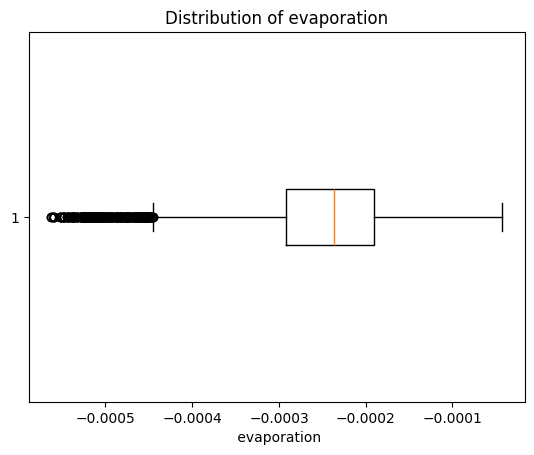

In [ ]:
plt.boxplot(data["e"], vert = False)
plt.xlabel(" evaporation")
plt.title("Distribution of evaporation");

In [ ]:
data["e"].describe()

,e
count,13500.000000
mean,-0.000246
std,0.000084
min,-0.000563
25%,-0.000292
50%,-0.000237
75%,-0.000190
max,-0.000043


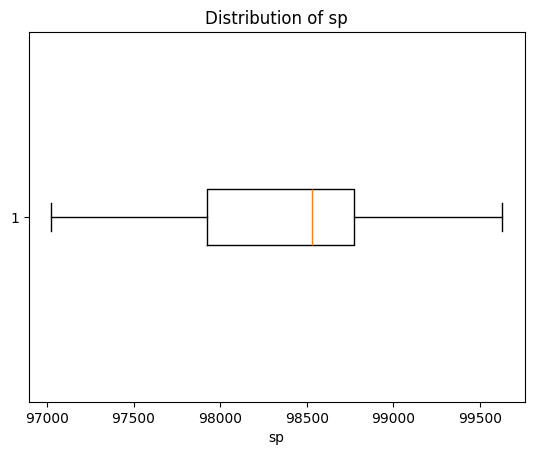

In [ ]:
plt.boxplot(data["sp"], vert = False)
plt.xlabel("sp")
plt.title("Distribution of sp");

In [ ]:
data["sp"].describe()

,sp
count,13500.000000
mean,98391.535532
std,505.038695
min,97024.516000
25%,97921.780000
50%,98531.315000
75%,98774.890000
max,99626.640000


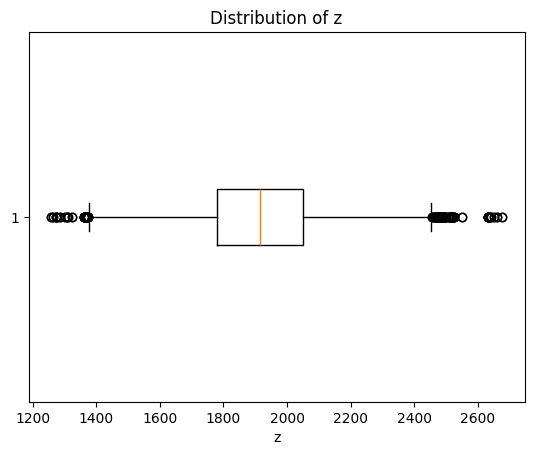

In [ ]:
plt.boxplot(data["z"], vert = False)
plt.xlabel("z")
plt.title("Distribution of z");

In [ ]:
data["z"].describe()

,z
count,13500.000000
mean,1921.159005
std,208.093236
min,1258.221200
25%,1779.893300
50%,1915.249800
75%,2049.445600
max,2675.590800


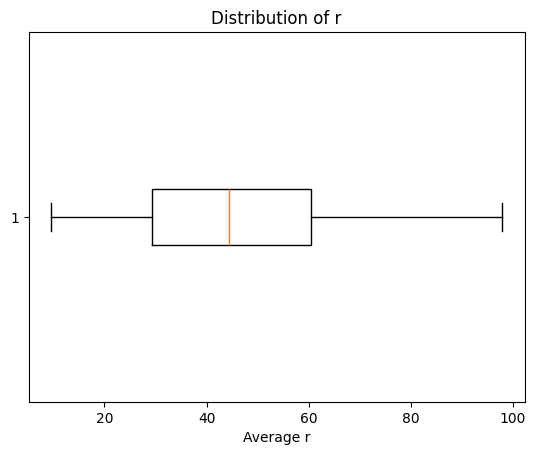

In [ ]:
plt.boxplot(data["r"], vert = False)
plt.xlabel("Average r")
plt.title("Distribution of r");

In [ ]:
data["r"].describe()

,r
count,13500.000000
mean,46.042779
std,20.239099
min,9.563421
25%,29.263329
50%,44.332774
75%,60.528744
max,97.859620


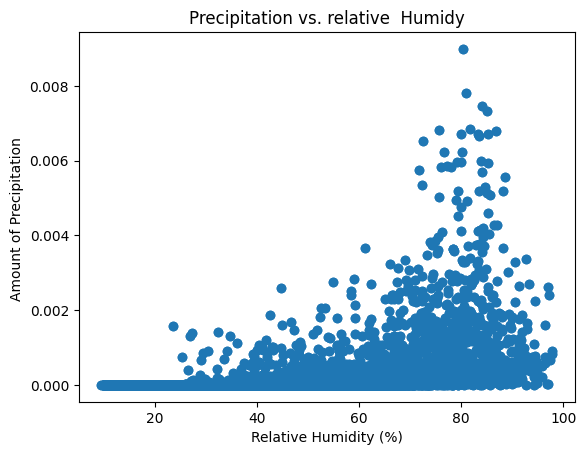

In [ ]:

plt.scatter(data["r"], data["tp"])
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Amount of Precipitation ")
plt.title("Precipitation vs. relative  Humidy");

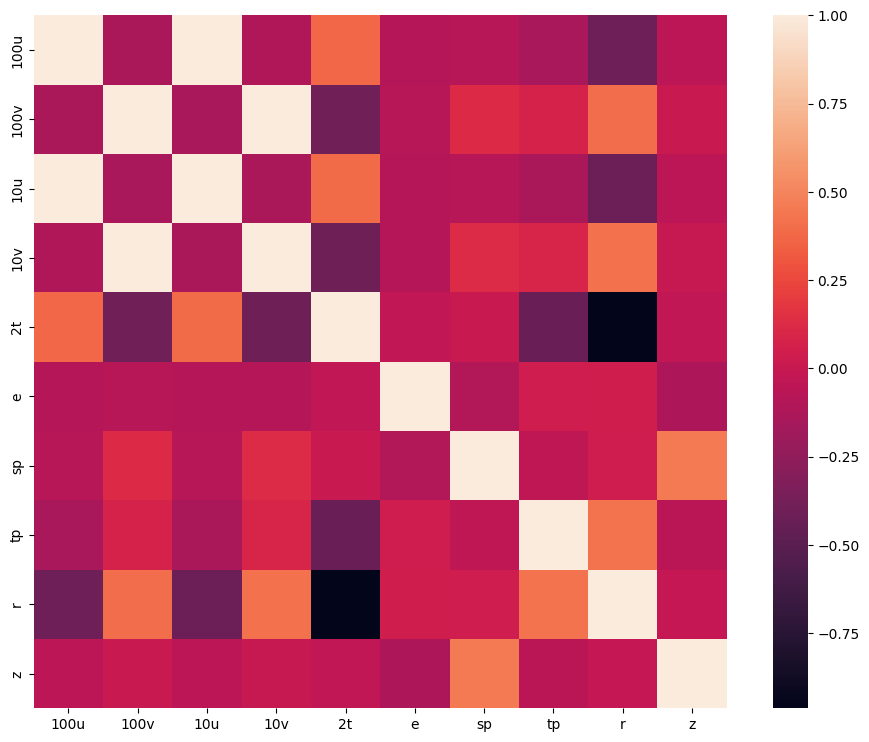

In [ ]:
# Correlation matrix.
new_df1 = data.drop(columns=['lon', 'lat','year', 'month', 'day',
       'day_of_week', 'hour', 'month_sin', 'month_cos', 'day_of_week_sin',
       'day_of_week_cos'])
# Shows the relationship between the dependent variables and the independent variable:
corrmatrix = new_df1.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmatrix, vmax = 1.0, square = True)
plt.show()

In [ ]:
p_correlation = data["r"].corr(data["tp"])
print("The Pearson correlation coefficient is: ", p_correlation)

The Pearson correlation coefficient is:  0.4220418940362721


Mean Squared Error (MSE): 0.0000000521
Mean Absolute Error (MAE): 0.0000311788
R-squared (R²): 0.8746717825
Predictions saved to 'decision_tree_predictions.csv'


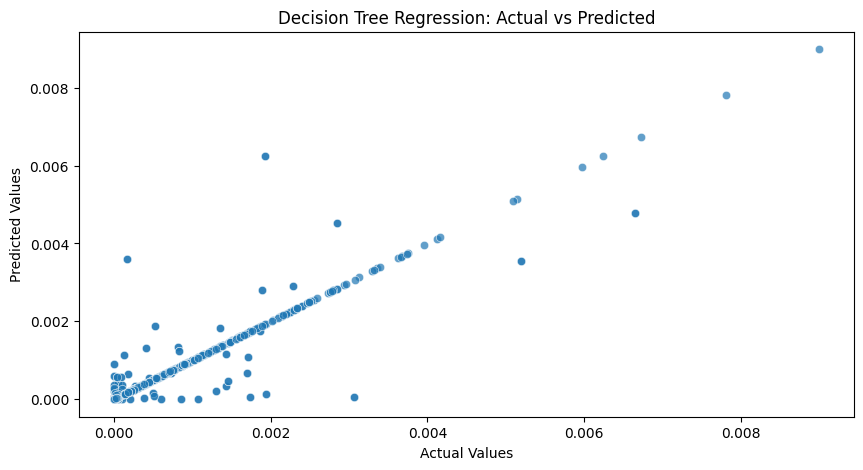

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Create the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)  # Random state for reproducibility

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.10f}")
print(f"Mean Absolute Error (MAE): {mae:.10f}")
print(f"R-squared (R²): {r2:.10f}")

# Save the predictions to a CSV file
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.to_csv('decision_tree_predictions.csv', index=False)
print("Predictions saved to 'decision_tree_predictions.csv'")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.show()


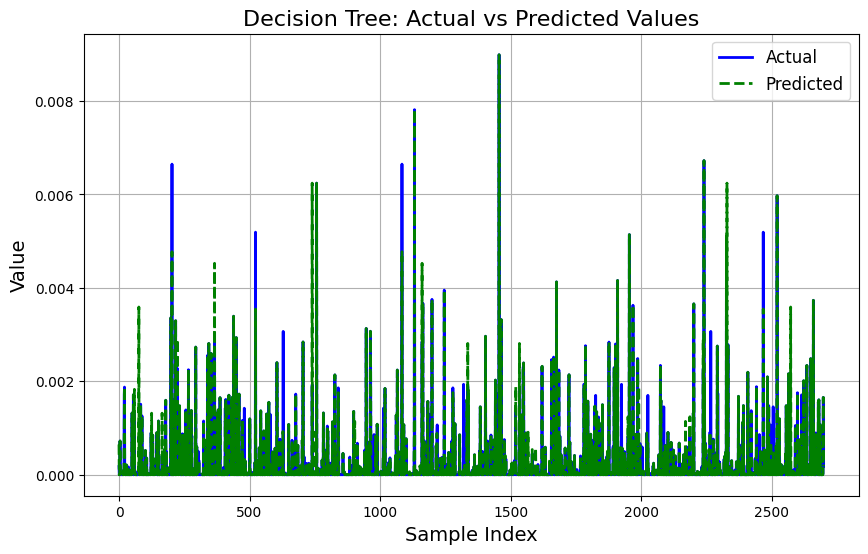

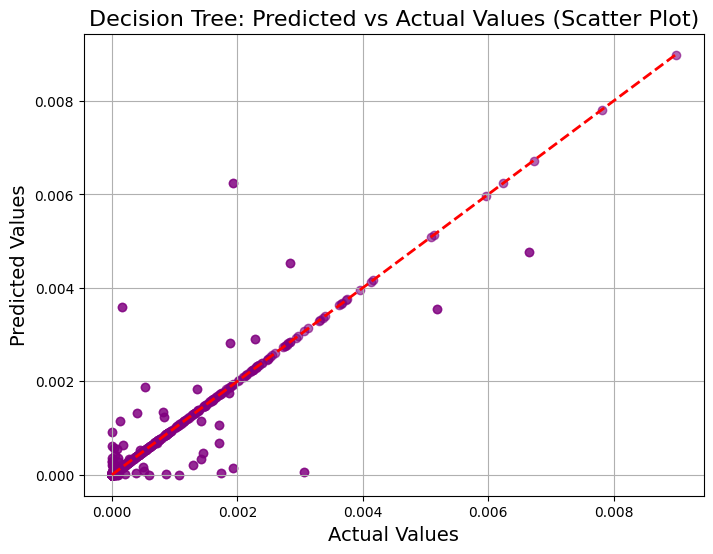

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test (actual values) and y_pred (predicted values) are available

# Convert y_test and y_pred to 1D arrays if they are not already
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

# Line Plot: Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue', linestyle='-', linewidth=2)
plt.plot(y_pred, label='Predicted', color='green', linestyle='--', linewidth=2)
plt.title('Decision Tree: Actual vs Predicted Values', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Decision Tree: Predicted vs Actual Values (Scatter Plot)', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure X_train and X_test are NumPy arrays
X_train_rf = np.array(X_train)  # Convert DataFrame to NumPy array
X_test_rf = np.array(X_test)

# Define the model
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    random_state=42,   # Seed for reproducibility
    max_depth=None,    # Let the model determine the depth
    min_samples_split=2,  # Minimum samples required to split an internal node
    min_samples_leaf=1    # Minimum samples required to be at a leaf node
)

# Train the model
rf_model.fit(X_train_rf, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_rf)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Random Forest Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.10f}")
print(f"Mean Absolute Error (MAE): {mae:.10f}")
print(f"R-squared (R²): {r2:.10f}")


Random Forest Model Evaluation:
Mean Squared Error (MSE): 0.0000000419
Mean Absolute Error (MAE): 0.0000679201
R-squared (R²): 0.8991905615


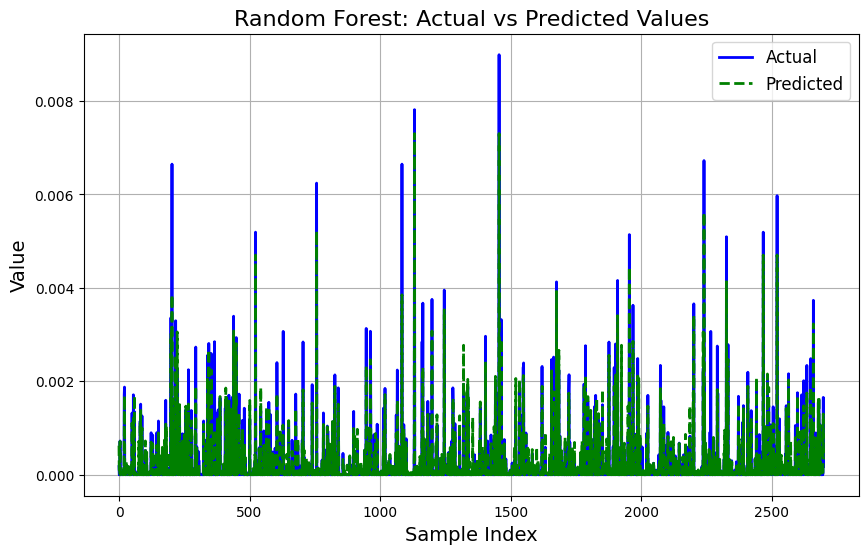

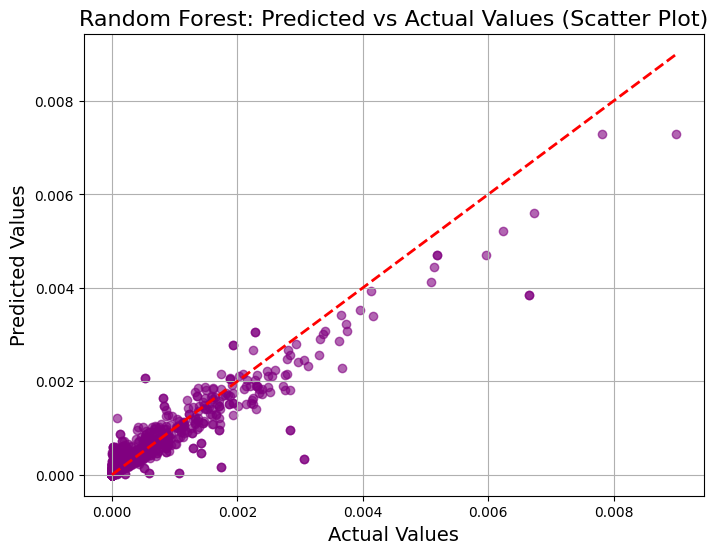

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test (actual values) and y_pred (predicted values) are available

# Convert y_test and y_pred to 1D arrays if they are not already
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

# Line Plot: Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue', linestyle='-', linewidth=2)
plt.plot(y_pred, label='Predicted', color='green', linestyle='--', linewidth=2)
plt.title('Random Forest: Actual vs Predicted Values', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Random Forest: Predicted vs Actual Values (Scatter Plot)', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Normalize input features
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_np = scaler_x.fit_transform(X_train)
X_test_np = scaler_x.transform(X_test)

# Ensure y_train and y_test are NumPy arrays and reshape correctly
y_train_np = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_np = scaler_y.transform(np.array(y_test).reshape(-1, 1))

# Reshape for LSTM (3D input)
X_train_np = X_train_np.reshape((X_train_np.shape[0], 1, X_train_np.shape[1]))
X_test_np = X_test_np.reshape((X_test_np.shape[0], 1, X_test_np.shape[1]))

# Build the optimized LSTM model
model = Sequential([
    Input(shape=(1, X_train_np.shape[2])),

    LSTM(128, activation='relu', return_sequences=True),
    Dropout(0.2),

    LSTM(128, activation='relu', return_sequences=True),
    Dropout(0.2),

    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.2),

    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.2),

    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),

    LSTM(32, activation='relu'),

    Dense(16, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

# Train the model with Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_np, y_train_np,
    epochs=50,
    batch_size=16,
    validation_data=(X_test_np, y_test_np),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
loss, mae = model.evaluate(X_test_np, y_test_np, verbose=1)
print(f"\n🔥 Model Evaluation - Test Loss: {loss:.10f}, Test MAE: {mae:.10f}")

# Predict and inverse scale
y_pred = model.predict(X_test_np)
y_pred = scaler_y.inverse_transform(y_pred)
y_test_np = scaler_y.inverse_transform(y_test_np)

# Compute R² Score
r2 = r2_score(y_test_np, y_pred)
print(f"📈 R² Score: {r2:.10f}")


Epoch 1/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0057 - mae: 0.0337 - val_loss: 0.0052 - val_mae: 0.0337
Epoch 2/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0056 - mae: 0.0351 - val_loss: 0.0052 - val_mae: 0.0335
Epoch 3/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0058 - mae: 0.0355 - val_loss: 0.0052 - val_mae: 0.0304
Epoch 4/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0045 - mae: 0.0284 - val_loss: 0.0039 - val_mae: 0.0249
Epoch 5/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0040 - mae: 0.0256 - val_loss: 0.0036 - val_mae: 0.0282
Epoch 6/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0039 - mae: 0.0253 - val_loss: 0.0036 - val_mae: 0.0221
Epoch 7/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.0038 - mae: 0.0247 - val_loss: 0.0035 - val_mae: 0.0235
Epoch 8/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0035 - mae: 0.0229 - val_loss: 0.0034 - val_mae: 0.0256
Epoch 9/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 8s

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X and y are your features and target variables
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Default: 5 neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualization (Add the visualization code shared earlier)


Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0002
R-squared (R²): 0.3234


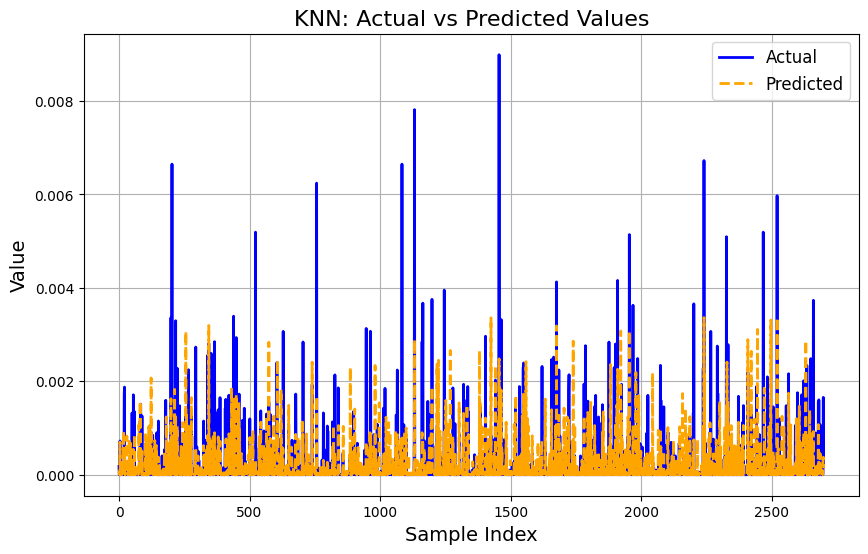

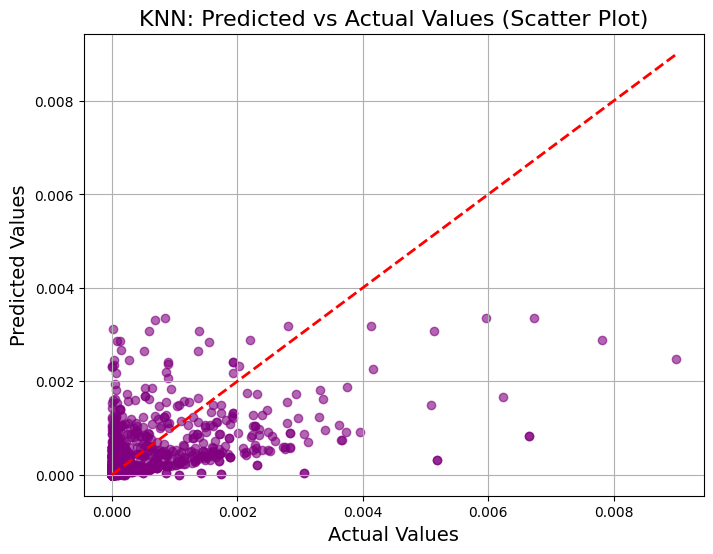

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test (actual values) and y_pred (predicted values) are available

# Convert y_test and y_pred to 1D arrays if they are not already
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

# Line Plot: Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue', linestyle='-', linewidth=2)
plt.plot(y_pred, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title('KNN: Actual vs Predicted Values', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('KNN: Predicted vs Actual Values (Scatter Plot)', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.grid(True)
plt.show()
